# Linear Regression and Gradient Descent algorithm
_**Linear Regression**_ is a linear approach to modeling the relationship between a dependent variable (Y) and one or more independent variables (X).

_**Gradient Descent**_ is an iterative optimization algorithm that finds the minimum of a function.
- **MSE** function is being used as the Cost Function ("Loss Function").
- Goal is to **minimize this error** value to obtain most accurate values for _**m (slope)**_ and _**b (y-intercept)**_, so the distance between all points and the line is as small as possible.

In [1]:
# Import libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generate random sample data
x, y = make_regression(n_samples=150, n_features=1, noise=40, random_state=42)
x = np.reshape(x, x.shape[0])

# Build the Gradient Descent function
def gradient_descent(x, y):
    m = 0 # Slope
    b = 0 # y-intercept
    # m, b = float(np.random.random(1)), float(np.random.random(1)) # Give random values to m & b instead of 0
    
    n = float(len(x)) # Sample size of training set
    
    alpha = 0.1 # Learning rate
    epochs = 1000 # Number of iterations
    
    prev_cost = 0 # Variable to be compared with cost value
    
    # Perform Gradient Descent algorithm
    for i in range(epochs):
        y_pred = m*x + b # Current predicted value of y
        cost = (1/n) * sum([val**2 for val in (y - y_pred)]) # MSE function used as the Cost Function
        Dm = (-2/n) * sum(x*(y - y_pred)) # Partial Derivative with respect of m
        Db = (-2/n) * sum(y - y_pred) # Partial Derivative with respect of b
        m = m - alpha*Dm # Update current value of m
        b = b - alpha*Db # Update current value of b
        
        # Compare previous cost with current cost. Stop loop when costs are similar
        if math.isclose(cost, prev_cost, rel_tol=1e-20):
            print('Gradient Descent reached its minimum value!\
            \nIterations: {}   | Cost: {}'.format(i, round(cost,3)))
            break
        
        prev_cost = cost # Update previous cost value
        
        # print("Iteration: {} | m = {} | b = {} | error = {}".format(i, m, b, cost))
        
    return m, b

# Call the function
m, b = gradient_descent(x=x, y=y)

# Print m & b optimal values and the Hypothesis
print('Slope (m):= {} | Y-intercept (b):= {}'.format(round(m,3), round(b,3)))
print('y = {}x + {}'.format(round(m,2), round(b,2)))

Gradient Descent reached its minimum value!            
Iterations: 111   | Cost: 1497.64
Slope (m):= 95.72 | Y-intercept (b):= 7.029
y = 95.72x + 7.03


### Plotting the Linear Regression best-fit line

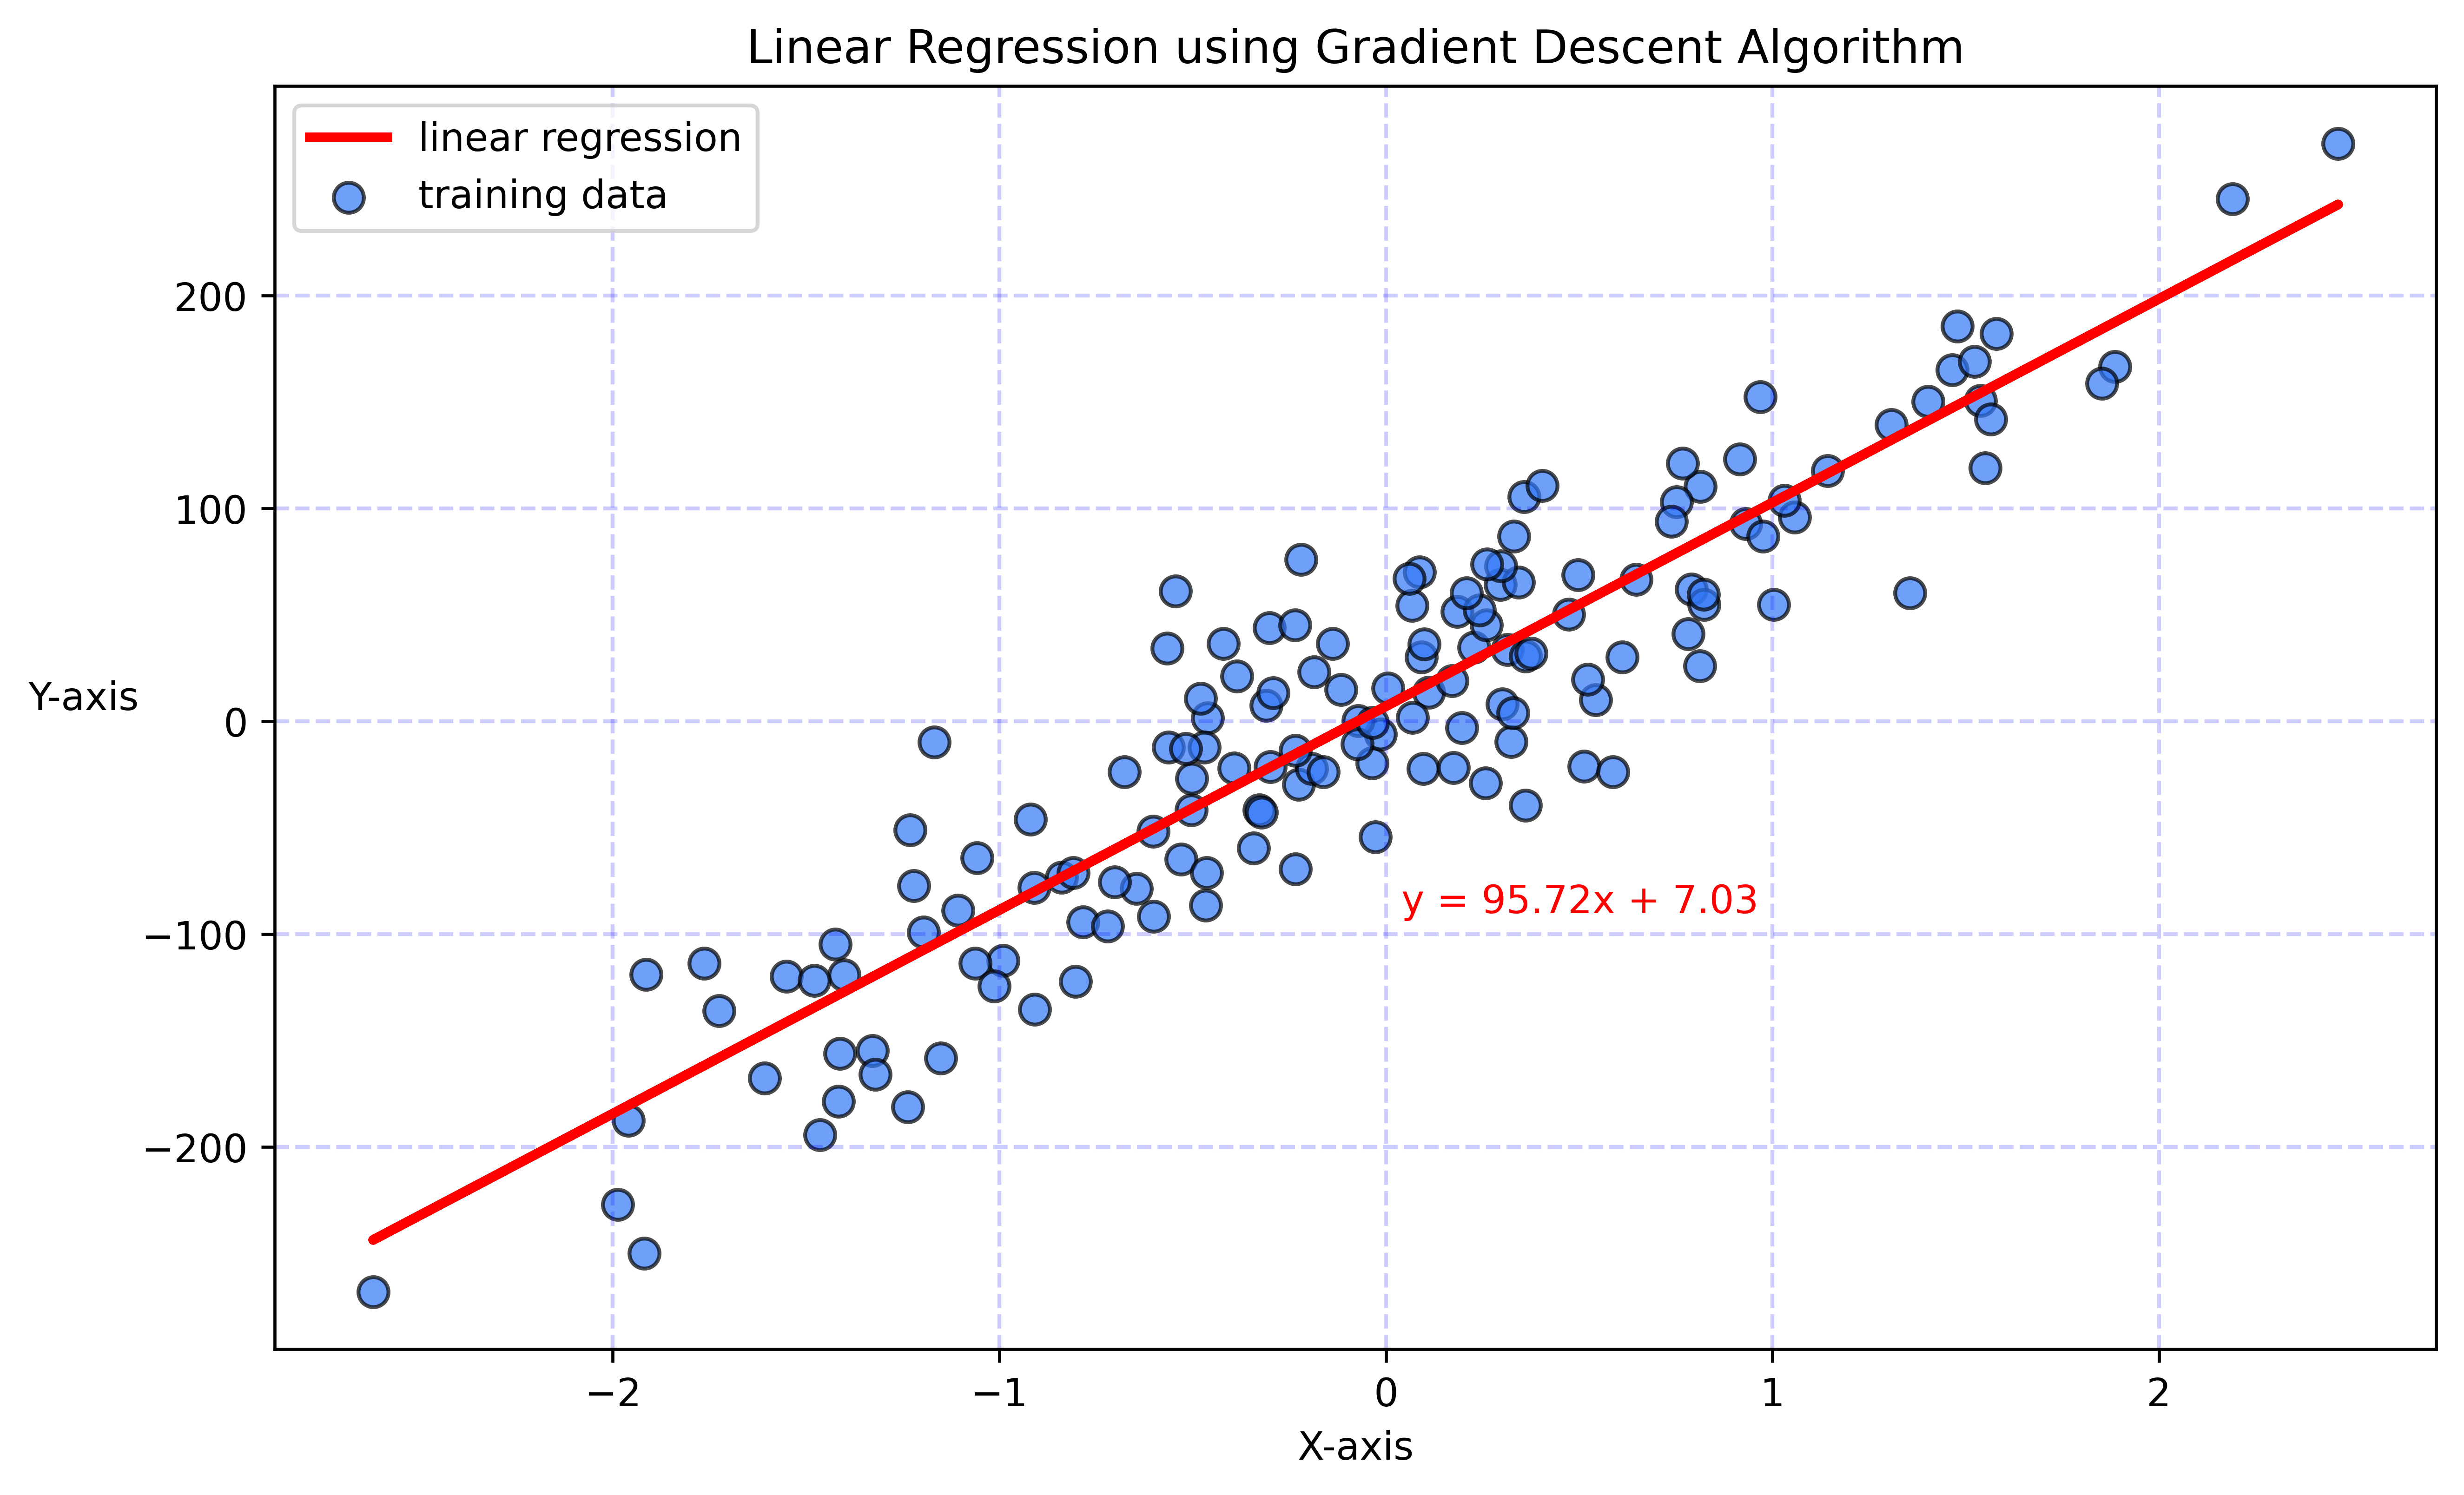

In [2]:
# Assign optimal values to the Hypothesis
y_pred = m*x + b

# Plot Linear Regression graph
plt.figure(figsize=(10,6), dpi=600)
plt.title('Linear Regression using Gradient Descent Algorithm')
plt.xlabel("X-axis")
plt.ylabel("Y-axis", rotation=0, labelpad=15)
plt.text(0.04, -90, 'y = {}x + {}'.format(round(m,2),round(b,2)), color='red', fontsize=10)
plt.scatter(x, y, color='#3176f7', label='training data', edgecolor='black', s=60, alpha=0.7)
plt.plot(x, y_pred, color='red', label='linear regression', linewidth=2.5)
plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
plt.legend(loc='upper left')
# plt.savefig('LinearRegression.jpg')
plt.show()